In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn import linear_model
import csv

## Data Read and Analysis

In [101]:
dataset0 = pd.read_csv("DS - Assignment Part 1 data set.csv")
dataset = dataset0.drop('Transaction date', axis=1)  # Seems complicated data to interpret by ML model to predict house price
# dataset = dataset.drop('House size (sqft)', axis=1)
print(dataset.head(5))

   House Age  Distance from nearest Metro station (km)  \
0       32.0                                  84.87882   
1       19.5                                 306.59470   
2       13.3                                 561.98450   
3       13.3                                 561.98450   
4        5.0                                 390.56840   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House size (sqft)  House price of unit area  
0                575                      37.9  
1               1240                      42.2  
2               1060                      47.3 

In [105]:
for i in dataset.columns:
    print("Basic statistics for feature : {0}".format(i))
    print(dataset[i].describe())
    print("----------------------------------")

Basic statistics for feature : House Age
count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: House Age, dtype: float64
----------------------------------
Basic statistics for feature : Distance from nearest Metro station (km)
count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: Distance from nearest Metro station (km), dtype: float64
----------------------------------
Basic statistics for feature : Number of convenience stores
count    414.000000
mean       4.094203
std        2.945562
min        0.000000
25%        1.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Number of convenience stores, dtype: float64
----------------------------------
Basic statistics for feature : latitude
count    414.000000
mean      24.969030
std     

In [84]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 0
Float variables: 5


In [86]:
dataset.isnull().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

<AxesSubplot:>

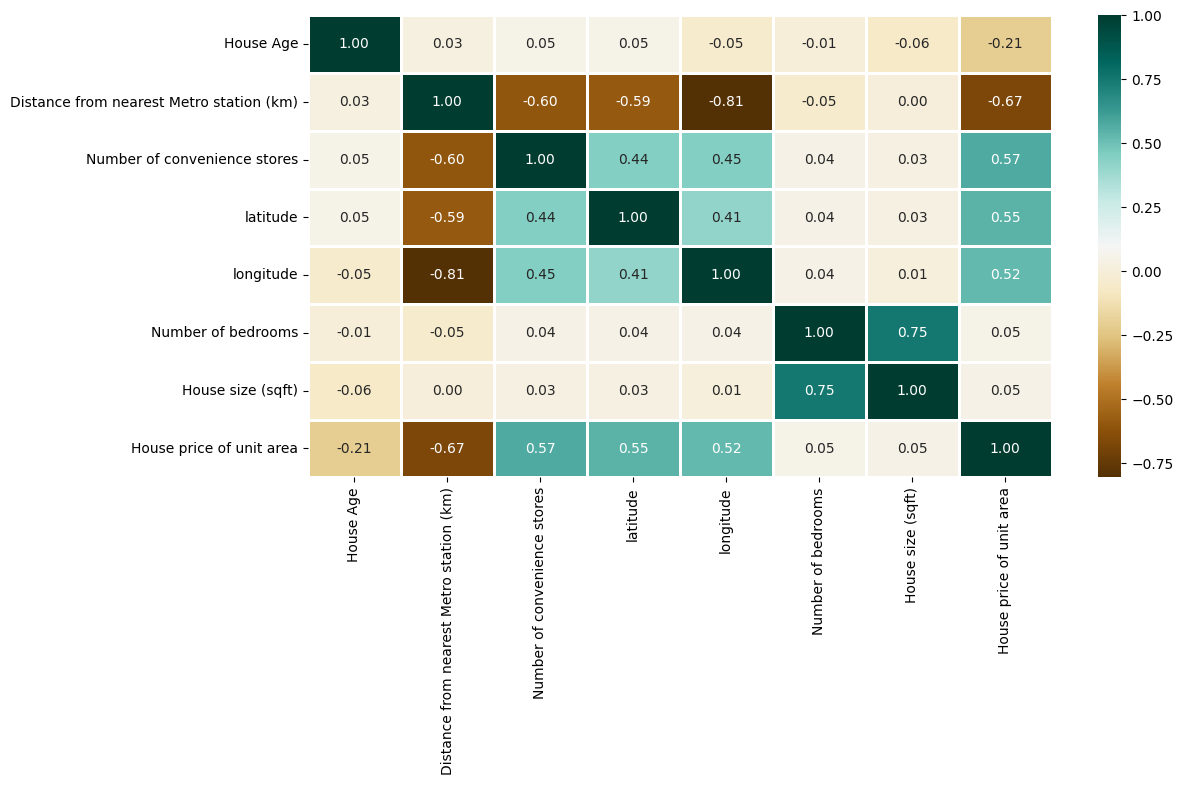

In [106]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Figure size 1000x1000 with 0 Axes>

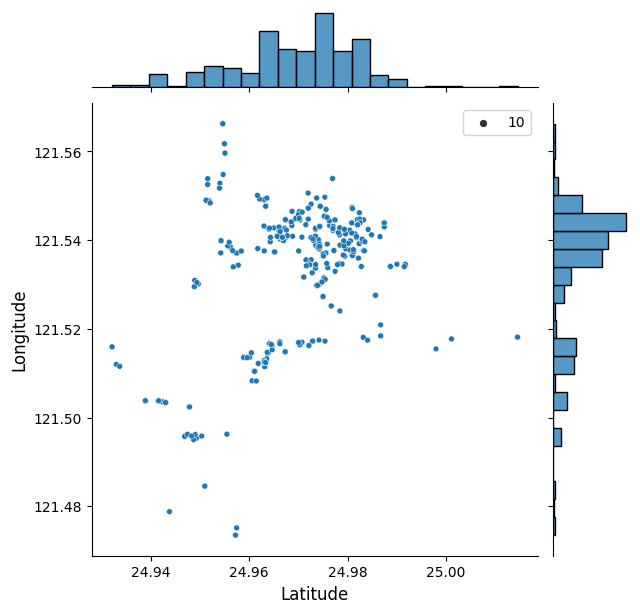

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [107]:
plt.figure(figsize=(10,10))
sns.jointplot(x=dataset.latitude.values, y=dataset.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
# plt1 = plt()
sns.despine

In [108]:
s = (dataset.dtypes == 'float64')
print(s)
float_cols = list(s[s].index)
print("Float variables:")
print(float_cols)
print('No. of. float features: ',
      len(float_cols))

House Age                                    True
Distance from nearest Metro station (km)     True
Number of convenience stores                False
latitude                                     True
longitude                                    True
Number of bedrooms                          False
House size (sqft)                           False
House price of unit area                     True
dtype: bool
Float variables:
['House Age', 'Distance from nearest Metro station (km)', 'latitude', 'longitude', 'House price of unit area']
No. of. float features:  5


In [109]:
s = (dataset.dtypes == 'objects')
print(s)
object_cols = list(s[s].index)
print("Float variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

House Age                                   False
Distance from nearest Metro station (km)    False
Number of convenience stores                False
latitude                                    False
longitude                                   False
Number of bedrooms                          False
House size (sqft)                           False
House price of unit area                    False
dtype: bool
Float variables:
[]
No. of. categorical features:  0


## House Price Prediction

In [149]:
res_rmse = {"Random Forest": 0, "Linear Regression":0, "Gradient boost regression":0, "Theil-Sen Regression":0, "RANSAC Regression":0, "Support Vector Machines":0}


In [171]:
def predict_house_price(dataset):
    OH_encoder = OneHotEncoder(sparse=False)
    OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
    OH_cols.index = dataset.index
    OH_cols.columns = OH_encoder.get_feature_names_out()
    df_final = dataset.drop(object_cols, axis=1)
    df_final = pd.concat([df_final, OH_cols], axis=1)

    X = df_final.drop(['House price of unit area'], axis=1)
    Y = df_final['House price of unit area']

    X_train, X_valid, Y_train, Y_valid = train_test_split(
        X, Y, train_size=0.8, test_size=0.2, random_state=0)

    print("Input values for ML models: \n 0: Random Forest \n 1: Linear Regression \n 2: Gradient boost regression \n 3: Theil-Sen Regression \n 4: RANSAC Regression \n 5: Support Vector Machines")

    pt = int(input("Enter the value: "))

    if pt==0:
        lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
        file_name = 'Random_forest_output.csv'
    elif pt==1:
        lr = linear_model.LinearRegression()
        file_name = 'Linear_Regression_output.csv'
    elif pt==2:
        lr = ensemble.GradientBoostingRegressor()
        file_name = 'Gradient_Boosting_Regression_output.csv'
    elif pt==3:
        lr = linear_model.TheilSenRegressor()
        file_name = 'Theil_Sen_Regression_output.csv'
    elif pt==4:
        lr = linear_model.RANSACRegressor(random_state=50)
        file_name = 'RANSAC_Regression_output.csv'
    elif pt==5:
        lr = svm.SVR()
        file_name = 'SVM_output.csv'
        
    model = lr.fit(X_train, Y_train)

    print ("R^2 is: \n", model.score(X_valid, Y_valid))
    predictions = model.predict(X_valid)
    
    with open(file_name, 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(predictions)
    
    from sklearn.metrics import mean_squared_error
    print ('RMSE is: \n', mean_squared_error(Y_valid, predictions)/len(predictions))
    actual_values = Y_valid
    plt.scatter(predictions, actual_values, alpha=.75,
                color='b') #alpha helps to show overlapping data
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Linear Regression Model')
        
    for i in range (-2, 3):
        alpha = 10**i
        rm = linear_model.Ridge(alpha=alpha)
        ridge_model = rm.fit(X_train, Y_train)
        preds_ridge = ridge_model.predict(X_valid)

        plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
        plt.xlabel('Predicted Price')
        plt.ylabel('Actual Price')
        plt.title('Ridge Regularization with alpha = {}'.format(alpha))
        overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                        ridge_model.score(X_valid, Y_valid),
                        mean_squared_error(Y_valid, preds_ridge))
        if pt==0:
            res_rmse["Random Forest"]=mean_squared_error(Y_valid, predictions)/len(predictions)
        elif pt==1:
            res_rmse["Linear Regression"]=mean_squared_error(Y_valid, predictions)/len(predictions)
        elif pt==2:
            res_rmse["Gradient boost regression"]=mean_squared_error(Y_valid, predictions)/len(predictions)
        elif pt==5:
            res_rmse["Support Vector Machines"]=mean_squared_error(Y_valid, predictions)/len(predictions)
        elif pt==3:
            res_rmse["Theil-Sen Regression"]=mean_squared_error(Y_valid, predictions)/len(predictions)
        elif pt==4:
            res_rmse["RANSAC Regression"]=mean_squared_error(Y_valid, predictions)/len(predictions)
    
        plt.annotate(overlay,xy=(12.1,10.6),size='x-large')
        plt.show()


Input values for ML models: 
 0: Random Forest 
 1: Linear Regression 
 2: Gradient boost regression 
 3: Theil-Sen Regression 
 4: RANSAC Regression 
 5: Support Vector Machines
Enter the value: 4
R^2 is: 
 0.5941051435505978
RMSE is: 
 0.8494401917375881


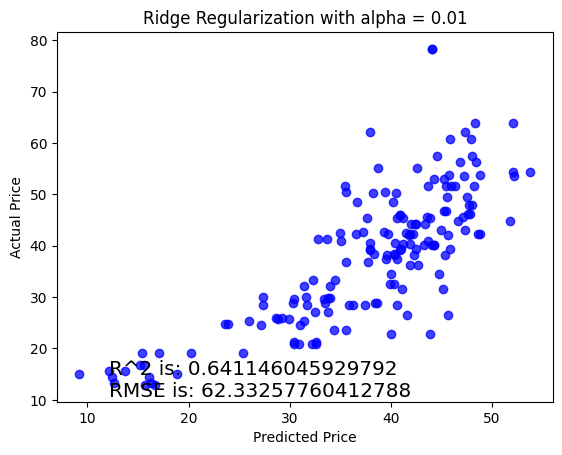

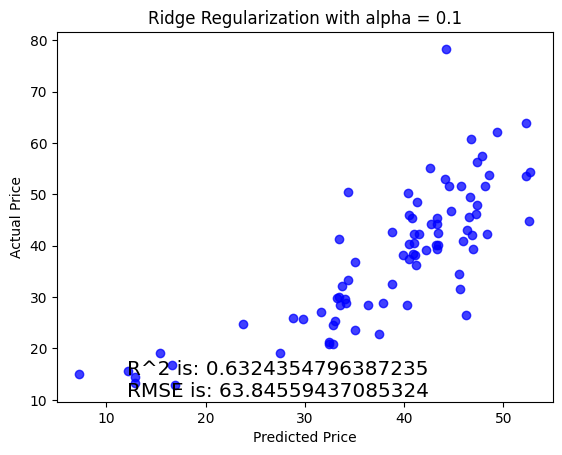

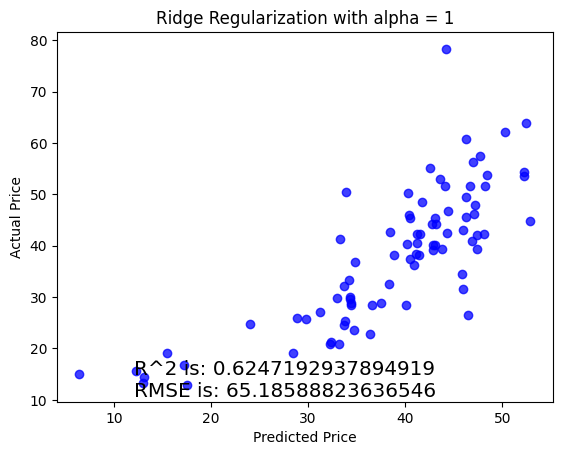

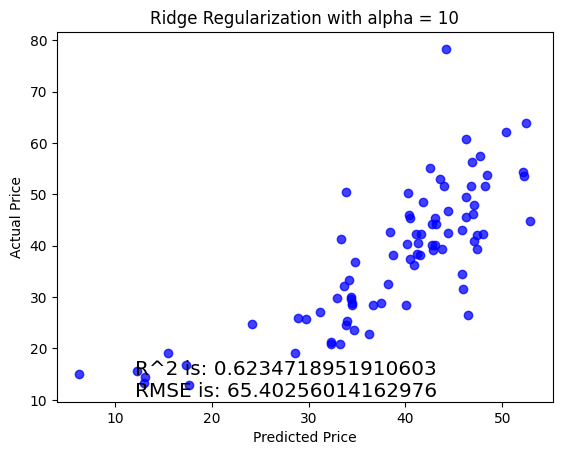

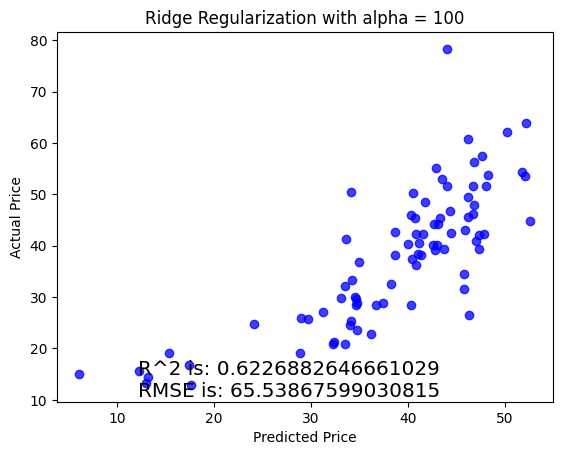

In [172]:
predict_house_price(dataset)

In [161]:
print(res_rmse)

{'Random Forest': 0.8096921958801633, 'Linear Regression': 0.7510613988697848, 'Gradient boost regression': 0.6082533591151116, 'Theil-Sen Regression': 0.8313660244356224, 'RANSAC Regression': 0.8494401917375881, 'Support Vector Machines': 0.8674614744404807}


### Thus Gradient Boosting Regression is effecient out of all of the ML models tested.